<a href="https://colab.research.google.com/github/ParhamPishro/Solutions-of-FUM-Academic-Exercises/blob/main/Machine%20Learning/3_Clustering_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN, KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.decomposition import PCA

import warnings
warnings.simplefilter(action = 'ignore')

In [ ]:
# Load dataset
data = pd.read_csv("Wholesale customers data.csv")
data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [ ]:
# Display basic information about the dataset
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [ ]:
data.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [ ]:
# Check for missing values
print(data.isnull().sum())

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64


In [ ]:
# Step 2: Preprocessing
# Scale continuous features
features_to_scale = ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']
scaler = StandardScaler()
data_scaled = data.copy()
data_scaled[features_to_scale] = scaler.fit_transform(data[features_to_scale])


In [ ]:
# Step 3: Exploratory Data Analysis (EDA)
# Correlation

correlation_matrix = data[features_to_scale].corr()
print(correlation_matrix)


                     Fresh      Milk   Grocery    Frozen  Detergents_Paper  \
Fresh             1.000000  0.100510 -0.011854  0.345881         -0.101953   
Milk              0.100510  1.000000  0.728335  0.123994          0.661816   
Grocery          -0.011854  0.728335  1.000000 -0.040193          0.924641   
Frozen            0.345881  0.123994 -0.040193  1.000000         -0.131525   
Detergents_Paper -0.101953  0.661816  0.924641 -0.131525          1.000000   
Delicassen        0.244690  0.406368  0.205497  0.390947          0.069291   

                  Delicassen  
Fresh               0.244690  
Milk                0.406368  
Grocery             0.205497  
Frozen              0.390947  
Detergents_Paper    0.069291  
Delicassen          1.000000  


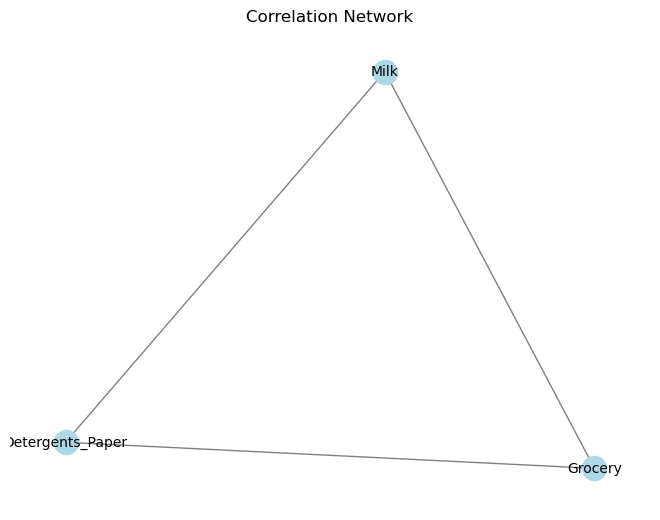

In [ ]:

# Correlation

import networkx as nx
corr = data[features_to_scale].corr()
G = nx.Graph()
for i in corr.columns:
    for j in corr.index:
        if abs(corr.loc[i, j]) > 0.5 and i != j:
            G.add_edge(i, j, weight=corr.loc[i, j])
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_color='lightblue', font_size=10, edge_color='gray')
plt.title('Correlation Network')
plt.show()


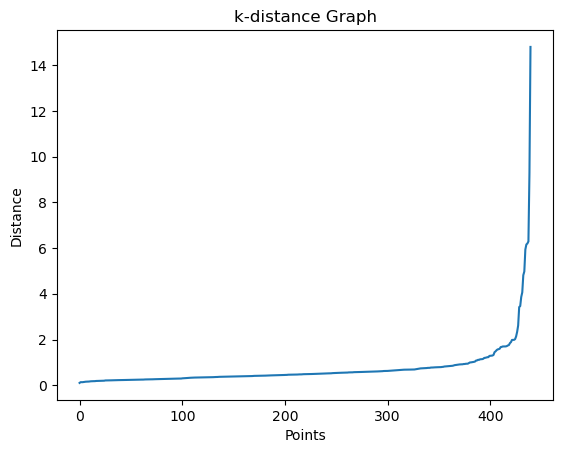

In [ ]:
# Step 4: DBSCAN Clustering
# Finding optimal eps using k-distance graph
def plot_k_distance(data, k):
    from sklearn.neighbors import NearestNeighbors
    neigh = NearestNeighbors(n_neighbors=k)
    neigh.fit(data)
    distances, _ = neigh.kneighbors(data)
    distances = np.sort(distances[:, k-1], axis=0)
    plt.plot(distances)
    plt.title("k-distance Graph")
    plt.xlabel("Points")
    plt.ylabel("Distance")
    plt.show()

plot_k_distance(data_scaled[features_to_scale], k=4)


In [ ]:
# Run DBSCAN
dbscan = DBSCAN(eps=1.5, min_samples=5)  # Adjust eps based on the k-distance graph
clusters_dbscan = dbscan.fit_predict(data_scaled[features_to_scale])
data['DBSCAN_Cluster'] = clusters_dbscan

In [ ]:
# Evaluate DBSCAN clustering
silhouette_dbscan = silhouette_score(data_scaled[features_to_scale], clusters_dbscan)
print("DBSCAN Silhouette Score:", silhouette_dbscan)

DBSCAN Silhouette Score: 0.6602347586576692


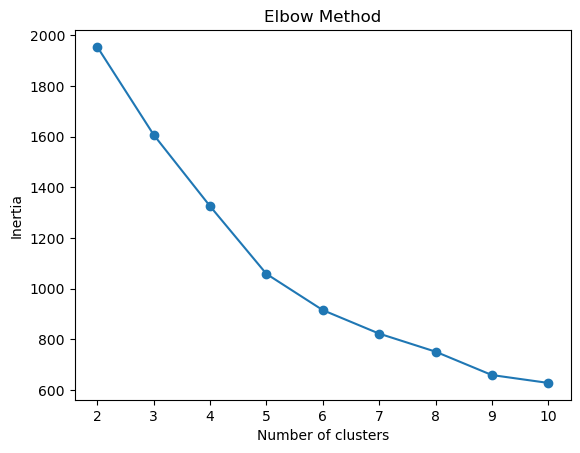

In [ ]:
# Step 5: K-Means Clustering
# Elbow Method
inertia = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled[features_to_scale])
    inertia.append(kmeans.inertia_)

plt.plot(range(2, 11), inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [ ]:
# Run K-Means
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans_clusters = kmeans.fit_predict(data_scaled[features_to_scale])
data['KMeans_Cluster'] = kmeans_clusters


In [ ]:
# Evaluate K-Means clustering
silhouette_kmeans = silhouette_score(data_scaled[features_to_scale], kmeans_clusters)
print("K-Means Silhouette Score:", silhouette_kmeans)

K-Means Silhouette Score: 0.40406527355371263


In [ ]:
for k in range(2, 6):
    kmeans = KMeans(n_clusters=k, random_state=42)
    clusters = kmeans.fit_predict(data_scaled[features_to_scale])
    score = silhouette_score(data_scaled[features_to_scale], clusters)
    print(f"Silhouette Score for k={k}: {score}")


Silhouette Score for k=2: 0.6136936741219485
Silhouette Score for k=3: 0.53836620585661
Silhouette Score for k=4: 0.40406527355371263
Silhouette Score for k=5: 0.3690403826812808


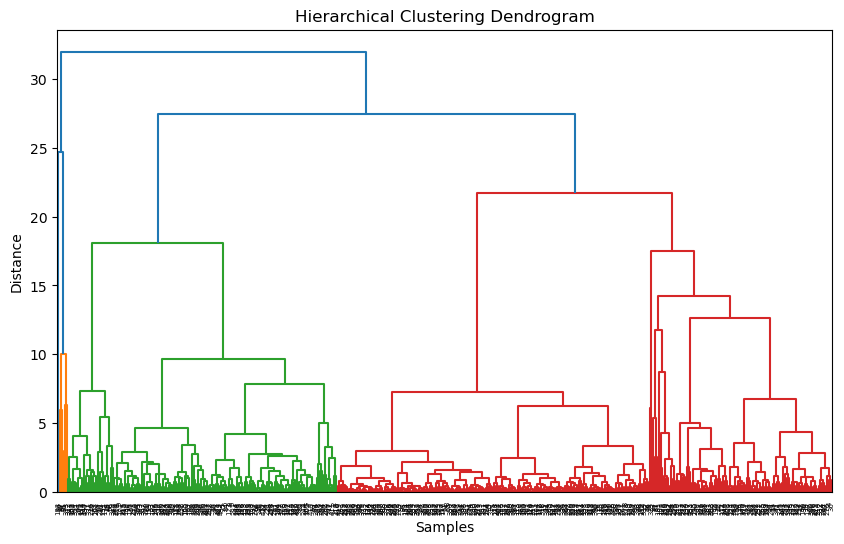

In [ ]:
# Step 6: Hierarchical Clustering
linkage_matrix = linkage(data_scaled[features_to_scale], method='ward')
plt.figure(figsize=(10, 6))
dendrogram(linkage_matrix)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Samples")
plt.ylabel("Distance")
plt.show()

In [ ]:
# Cut the dendrogram to form clusters
hc_clusters = fcluster(linkage_matrix, t=3, criterion='maxclust')
data['Hierarchical_Cluster'] = hc_clusters

In [ ]:
# Evaluate Hierarchical clustering
silhouette_hc = silhouette_score(data_scaled[features_to_scale], hc_clusters)
print("Hierarchical Clustering Silhouette Score:", silhouette_hc)

Hierarchical Clustering Silhouette Score: 0.2646091480214908


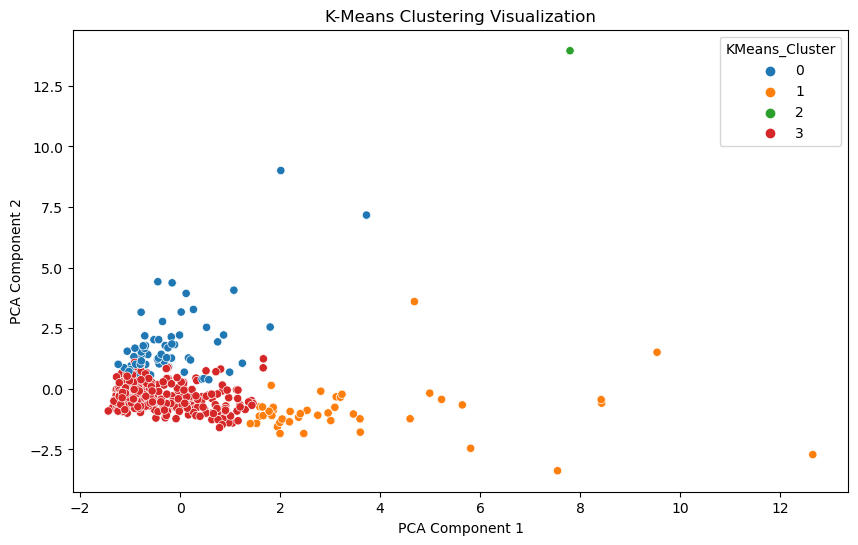

In [ ]:
# Step 7: Visualization of Clusters
# PCA for 2D visualization
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_scaled[features_to_scale])

plt.figure(figsize=(10, 6))
sns.scatterplot(x=data_pca[:, 0], y=data_pca[:, 1], hue=data['KMeans_Cluster'], palette='tab10')
plt.title('K-Means Clustering Visualization')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

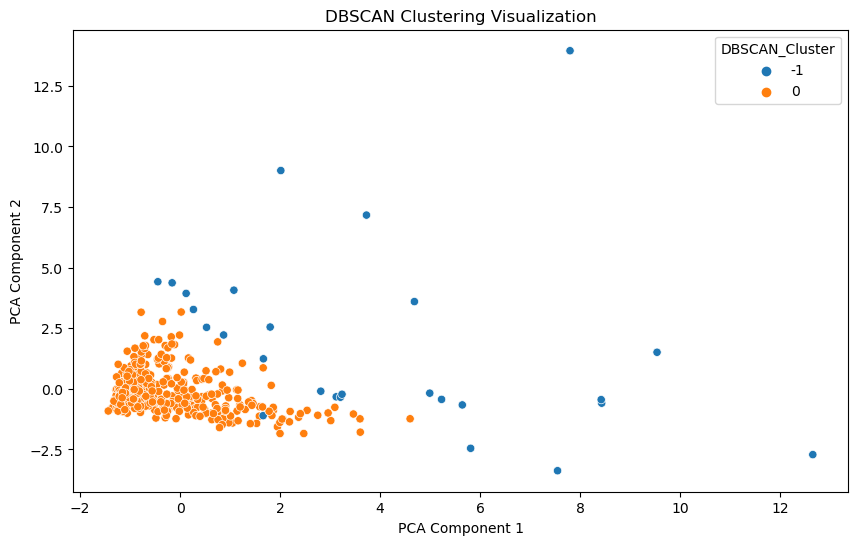

In [ ]:

# Run DBSCAN
# dbscan = DBSCAN(eps=1.5, min_samples=5)  # Adjust eps based on the k-distance graph
# clusters_dbscan = dbscan.fit_predict(data_scaled[features_to_scale])
# data['DBSCAN_Cluster'] = clusters_dbscan

# کاهش ابعاد با PCA
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_scaled[features_to_scale])

# رسم نمودار
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=data_pca[:, 0],
    y=data_pca[:, 1],
    hue=data['DBSCAN_Cluster'],
    palette='tab10',
    legend='full'
)
plt.title('DBSCAN Clustering Visualization')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()


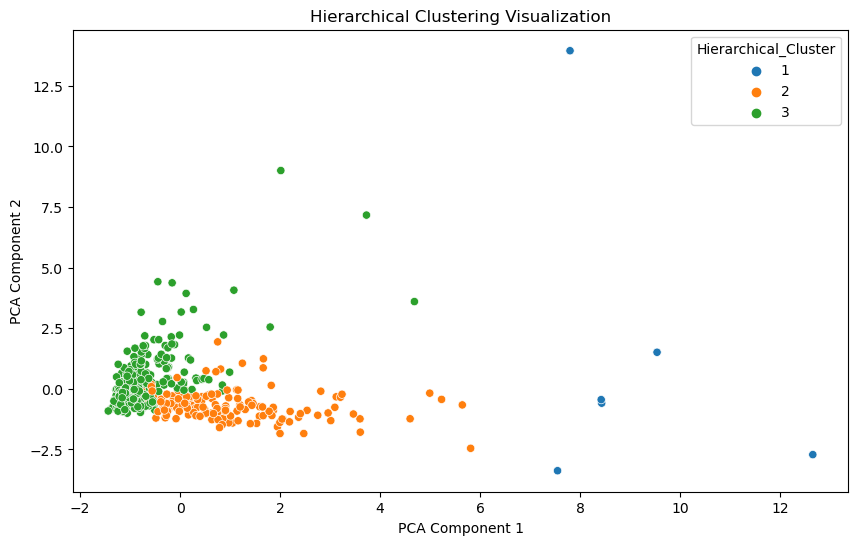

In [ ]:

# # Hierarchical clustering
# linkage_matrix = linkage(data_scaled[features_to_scale], method='ward')
# hc_clusters = fcluster(linkage_matrix, t=3, criterion='maxclust')
# data['Hierarchical_Cluster'] = hc_clusters

# PCA for visualization
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_scaled[features_to_scale])

# Plot Hierarchical clustering
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=data_pca[:, 0],
    y=data_pca[:, 1],
    hue=data['Hierarchical_Cluster'],
    palette='tab10',
    legend='full'
)
plt.title('Hierarchical Clustering Visualization')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()
